<a href="https://colab.research.google.com/github/SangamSilwal/Machine-learning-Series/blob/main/Random_Forest_vs_DecisionTree_Day31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest vs Decision Tree Classifier

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
X,y = make_circles(n_samples=500,factor=0.1,noise=0.35,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

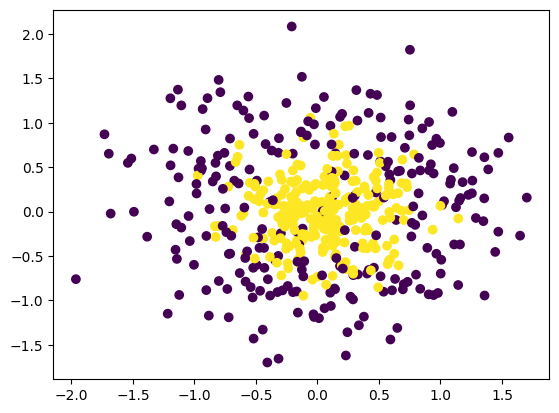

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)

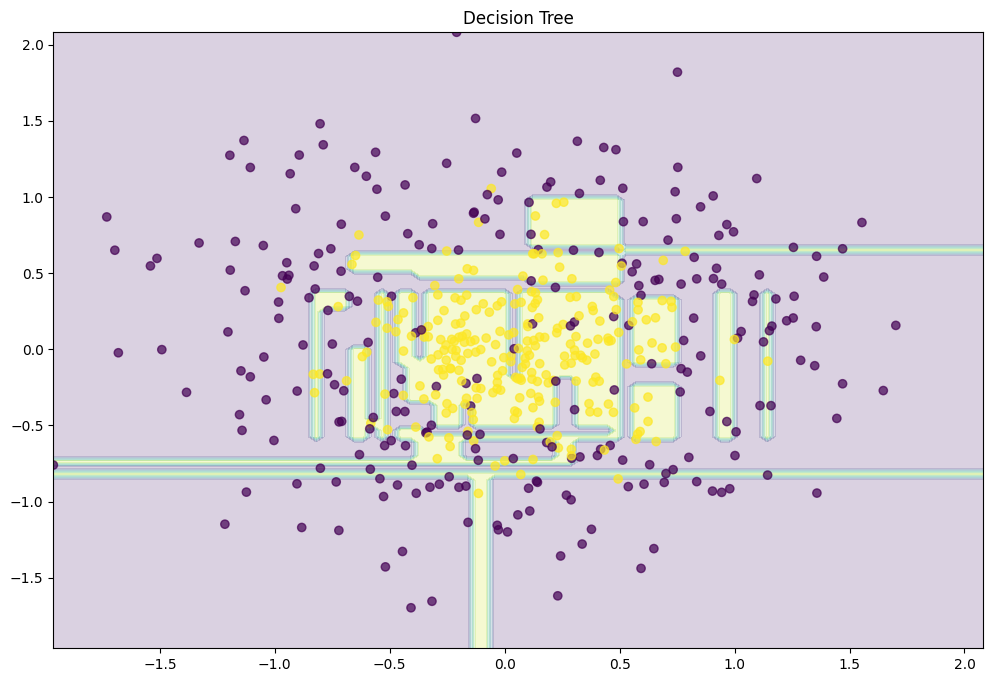

In [5]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,y_train)
plt.figure(figsize=(12,8))
x_range = np.linspace(X.min(),X.max(),100)
xx1,xx2 = np.meshgrid(x_range,x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(),xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1,xx2,y_hat,alpha=0.2)
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',alpha=0.7)
plt.title("Decision Tree")
plt.show()

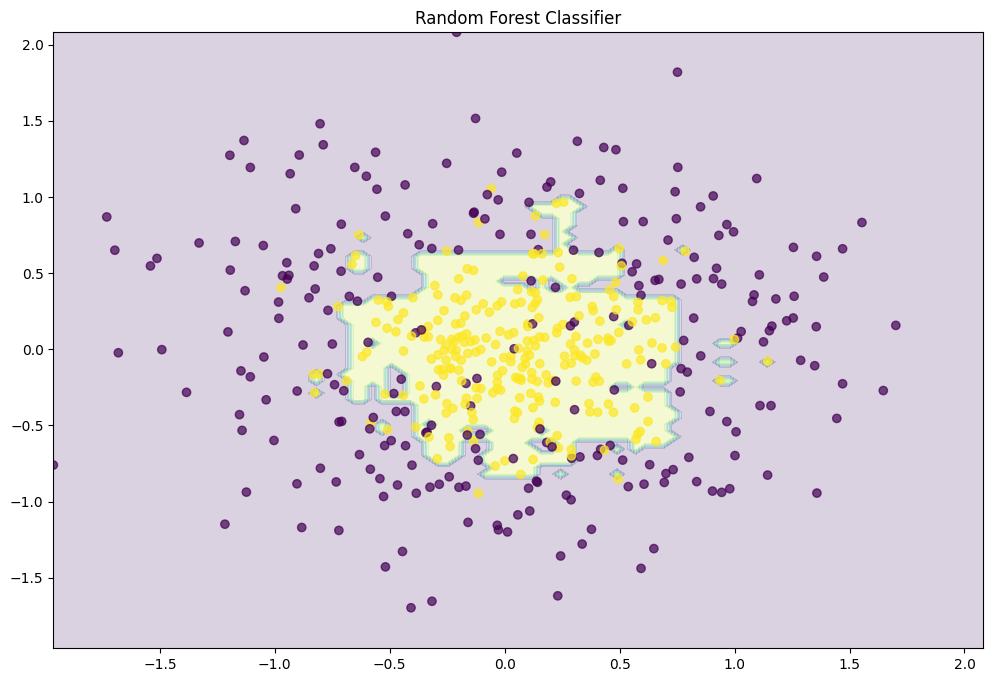

In [6]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500,random_state=42)
rfc.fit(X_train,y_train)
plt.figure(figsize=(12,8))
x_range = np.linspace(X.min(),X.max(),100)
xx1,xx2 = np.meshgrid(x_range,x_range)
y_hat = rfc.predict(np.c_[xx1.ravel(),xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1,xx2,y_hat,alpha=0.2)
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',alpha=0.7)
plt.title("Random Forest Classifier")
plt.show()


In [15]:
n_train = 150
n_test = 1000
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

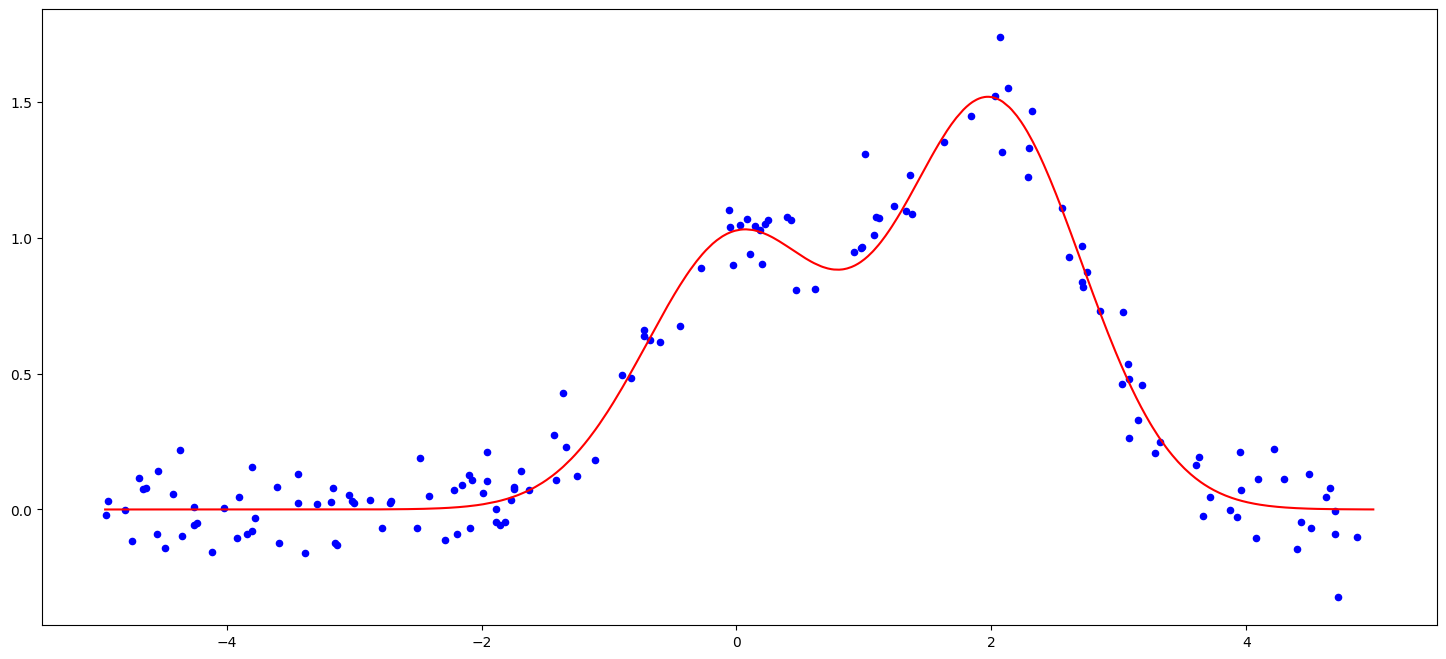

In [19]:
plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test),'r')
plt.scatter(X_train, y_train, c="b", s=20)


Text(0.5, 1.0, 'Decision tree, MSE = 19.34')

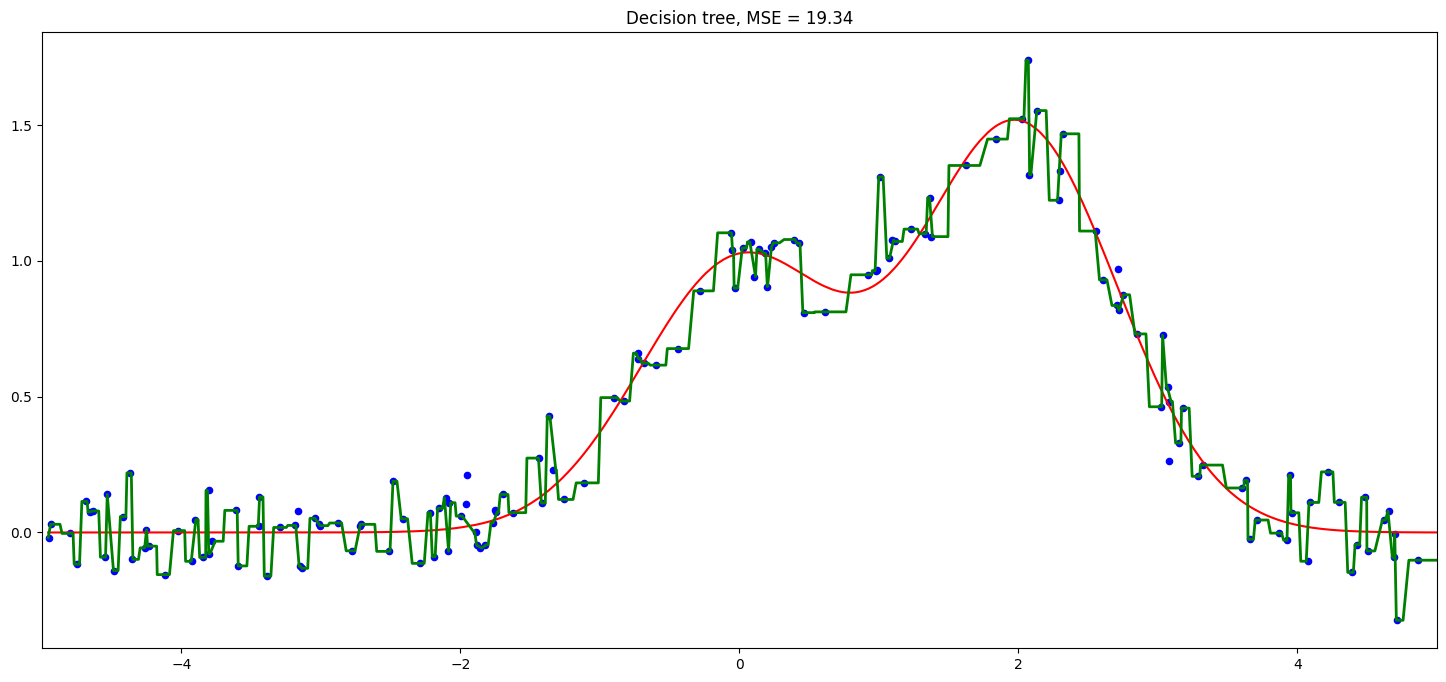

In [20]:


# One decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, d_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree, MSE = %.2f"
          % np.sum((y_test - d_predict) ** 2))

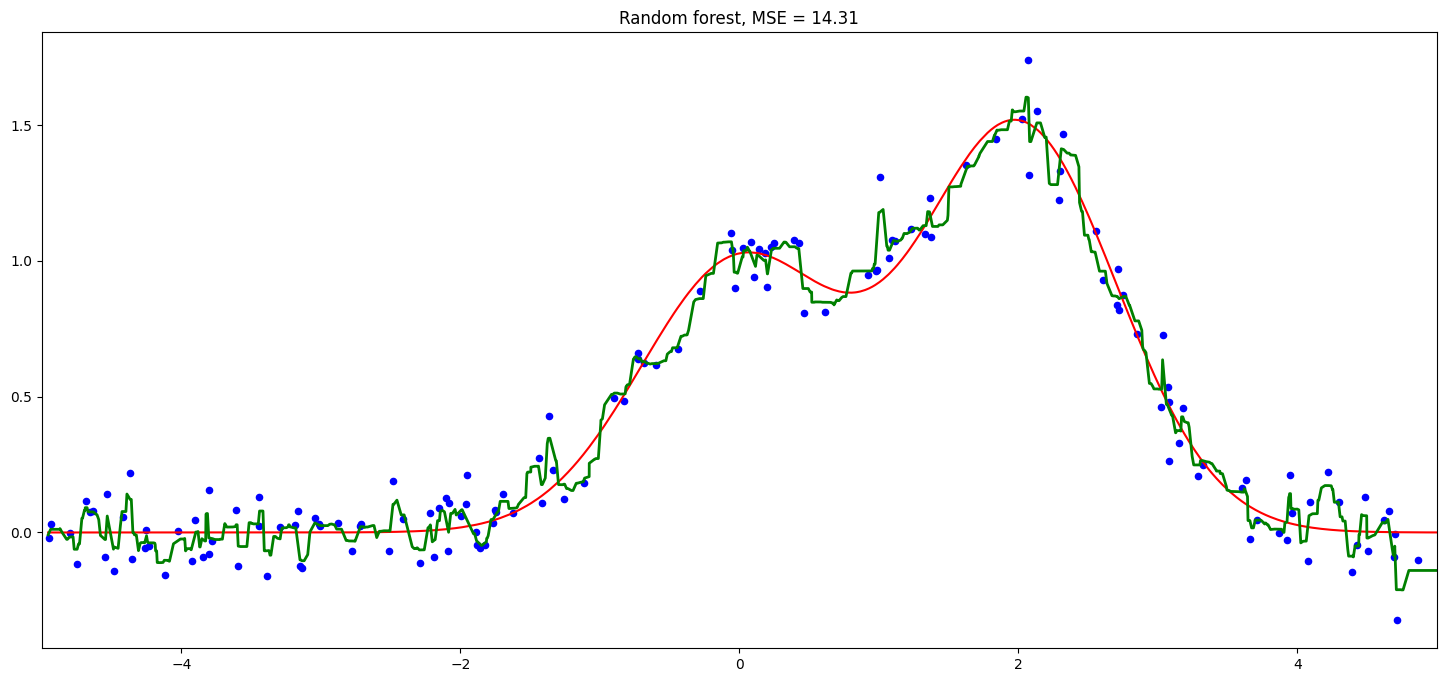

In [21]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
rf_predict = rfr.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));


# Conclusion of Decision Tree VS Random Forest

Here We Can Clearly see that Decison Tree shows low bias but high variance type . But Random Forest shows low variance and low bias. Low variance means that the model will be consistent with other or new type of datasets but high variance means the model is inconsistance to new types of datasets.

So in Conclusion:
>- Variance : measure of consistancy of the model when dealing with new datasets

>- Bias : measure of accuracy when dealing with the training dataset

High bias means overfitting in the datsets. Basically there is inverse relation between variance and bias which is Bias variance trade off

So Random Forest helps to deal with this problem. It is similar to Bagging but not actually Bagging